# Discovery Stage

## Import Data and Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [5]:
data=pd.read_csv('final_model.csv')

In [6]:
#show all columns
pd.set_option('display.max_columns', None)
data.head()


,Unnamed: 0,Labor Force,Unemployed,Family Poverty,HS Graduates,Bachelors Degree,Grad/Prof Degree,Private Health Ins,Public Health Ins,No Health Ins,No Vehicles,One Vehicle,Two Vehicles,Three+ Vehicles,Drive Alone,Carpooled,Public Transit,Total Population,NAME,state,county,tract,State,County,Census Tract Number,Life Expectancy,Life Expectancy Range,Life Expectancy Standard Error,Tract,geometry_,STATEFP10,COUNTYFP10,TRACTCE10,geoid,NAME10,NAMELSAD10,commarea,neighborhood
0,0,456.0,80.0,43.3,182.0,77.0,21.0,357.0,697.0,163.0,130.0,233.0,65.0,2.0,31.0,31.0,154.0,1185.0,"Census Tract 2714, Cook County, Illinois",17,31,271400,Illinois,"Cook County, IL",2714.0,68.6,56.9-75.1,3.6228,271400.0,MULTIPOLYGON (((-87.71080299996187 41.87426299...,17,31,271400,17031271400,2714.0,Census Tract 2714,27,EAST GARFIELD PARK
1,1,5892.0,174.0,0.0,226.0,2927.0,2367.0,6417.0,322.0,247.0,1313.0,2458.0,403.0,56.0,25.4,200.0,800.0,6811.0,"Census Tract 2801, Cook County, Illinois",17,31,280100,Illinois,"Cook County, IL",2801.0,NaN,NaN,NaN,280100.0,MULTIPOLYGON (((-87.64571900003747 41.88179600...,17,31,280100,17031280100,2801.0,Census Tract 2801,28,NEAR WEST SIDE
2,2,1126.0,162.0,14.2,194.0,326.0,145.0,828.0,398.0,525.0,152.0,263.0,213.0,71.0,51.7,54.0,214.0,1673.0,"Census Tract 3103, Cook County, Illinois",17,31,310300,Illinois,"Cook County, IL",3103.0,79.1,77.6-79.5,3.2225,310300.0,MULTIPOLYGON (((-87.64926400002443 41.85259500...,17,31,310300,17031310300,3103.0,Census Tract 3103,31,LOWER WEST SIDE
3,3,2440.0,277.0,26.9,1031.0,204.0,78.0,1578.0,2357.0,1053.0,375.0,495.0,460.0,187.0,66.0,190.0,371.0,4815.0,"Census Tract 2002, Cook County, Illinois",17,31,200200,Illinois,"Cook County, IL",2002.0,78.5,77.6-79.5,1.9401,200200.0,MULTIPOLYGON (((-87.74165199997601 41.93159800...,17,31,200200,17031200200,2002.0,Census Tract 2002,20,HERMOSA
4,4,2048.0,74.0,12.7,479.0,627.0,312.0,1929.0,448.0,733.0,280.0,772.0,195.0,25.0,38.8,110.0,801.0,3034.0,"Census Tract 2214, Cook County, Illinois",17,31,221400,Illinois,"Cook County, IL",2214.0,80.9,79.6-81.6,3.0748,221400.0,MULTIPOLYGON (((-87.69738199997865 41.92358800...,17,31,221400,17031221400,2214.0,Census Tract 2214,22,LOGAN SQUARE


In [10]:
columns = ['Labor Force', 'Unemployed', 'Family Poverty', 'HS Graduates', 'Bachelors Degree', 'Grad/Prof Degree', 'Private Health Ins', 'Public Health Ins', 'No Health Ins', 'No Vehicles', 'One Vehicle', 'Two Vehicles', 'Three+ Vehicles', 'Drive Alone', 'Carpooled', 'Public Transit', 'Total Population']
new_df = df[columns]

In [26]:
new_df = new_df.fillna(new_df.median())
y=y.fillna(y.median())
new_df = new_df.dropna()
y = y.dropna()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
df=data
#split the data into train and test
#Response variable
y = df['Life Expectancy']
#Predictor variables
X = new_df

In [27]:
#split
X=new_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
#linear regression, 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [29]:
#summary of lm
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     32.31
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           3.60e-71
Time:                        22:47:49   Log-Likelihood:                -1431.5
No. Observations:                 560   AIC:                             2899.
Df Residuals:                     542   BIC:                             2977.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 74.1759      0.436    170.141      0.000      73.320      75.032
Labor Force            0.0008      0.001      0.750      0.454      -0.001       0.003
Unemployed            -0.0083      0.002     -4.907      0.000      -0.012      -0.005
Family Poverty        -0.0448      0.011     -3.951      0.000      -0.067      -0.023
HS Graduates          -0.0002      0.001     -0.174      0.862      -0.002       0.002
Bachelors Degree       0.0018      0.001      1.815      0.070      -0.000       0.004
Grad/Prof Degree       0.0038      0.001      3.391      0.001       0.002       0.006
Private Health Ins     0.0045      0.001      4.137      0.000       0.002       0.007
Public Health Ins      0.0034      0.001      3.149      0.002       0.001       0.005
No Health Ins          0.0079      0.001      6.093      0.000       0.005       0.010
No Vehicles           -0.0012      0.001     -1.296      0.195      -0.003       0.001
One Vehicle           -0.0054      0.001     -4.843      0.000      -0.008      -0.003
Two Vehicles          -0.0004      0.002     -0.203      0.839      -0.004       0.004
Three+ Vehicles       -0.0050      0.003     -1.456      0.146      -0.012       0.002
Drive Alone            0.0448      0.011      3.951      0.000       0.023       0.067
Carpooled              0.0057      0.002      3.030      0.003       0.002       0.009
Public Transit         0.0006      0.001      0.789      0.431      -0.001       0.002
Total Population      -0.0042      0.001     -3.628      0.000      -0.006      -0.002
==============================================================================
Omnibus:                        4.067   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                4.105
Skew:                          -0.138   Prob(JB):                        0.128
Kurtosis:                       3.316   Cond. No.                     1.83e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)

import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train).fit()
model.summary()

c:\Users\goodm\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- const

  warnings.warn(message, FutureWarning)


ValueError: X has 17 features, but PolynomialFeatures is expecting 18 features as input.

Text(0.5, 0, 'Drive Alone')

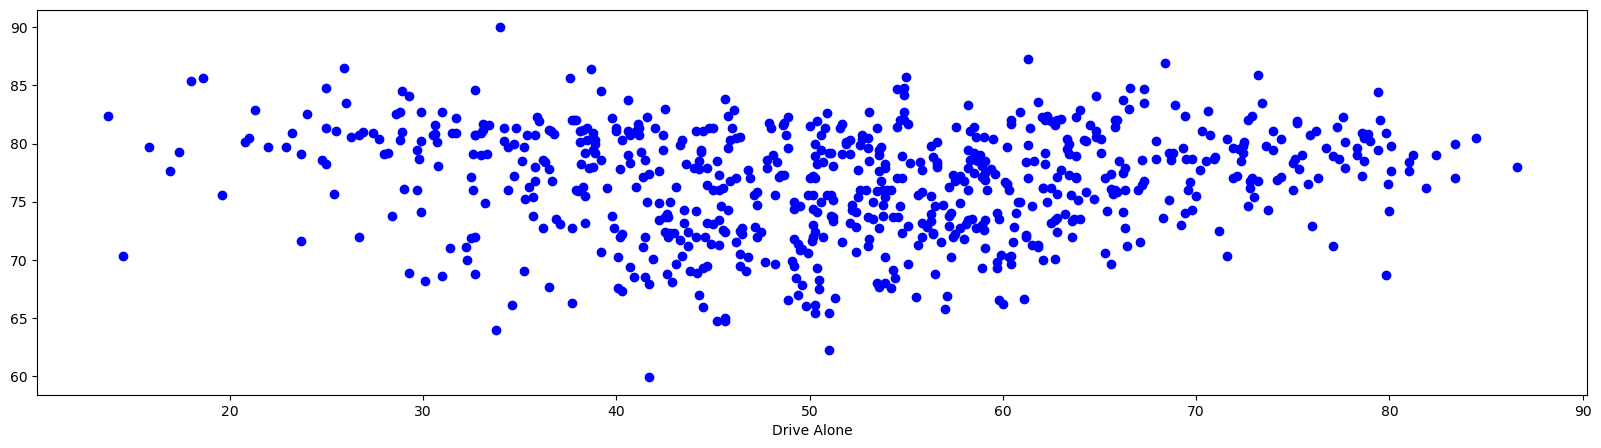

In [36]:
#plot life expectency and top 5 predictors
plt.figure(figsize=(20, 5))
plt.scatter(df['Drive Alone'], df['Life Expectancy'], color='blue')
plt.xlabel('Drive Alone')
